In [1]:
# import trax
# from trax import layers as tl
# import trax.fastmath.numpy as fastnp
# from trax.supervised import training
from functools import partial
import numpy as np
from itertools import combinations
import random as rnd
from random import sample
import json
import sklearn.metrics as metrics
from sklearn.metrics import classification_report , confusion_matrix, roc_auc_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import copy
import torch
import os
import warnings
from scipy.spatial import distance
from os import walk
from transformers import AutoTokenizer, AutoModel
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#initialize codebert
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
model_codebert = AutoModel.from_pretrained("microsoft/codebert-base").to(device)
np.random.seed(777)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from os import walk

from transformers import AutoModelForCausalLM
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Calculate project counts and filter only those with more than 30 entries
project_counts = data['project'].value_counts()
filtered_projects = project_counts[project_counts > 30]

# Filter the data to include only the selected projects
filtered_data = data[data['project'].isin(filtered_projects.index)]

# Group by 'project' and 'category' to get counts of each category within each project
category_counts = filtered_data.groupby(['project', 'category']).size().unstack(fill_value=0)

# Create a DataFrame for project counts to ensure it has a compatible index for joining
project_counts_df = pd.DataFrame(filtered_projects)
project_counts_df.columns = ['project_count']

# Reset index to ensure 'project' is a column for a proper join
project_counts_df.reset_index(inplace=True)
category_counts.reset_index(inplace=True)

# Merge the dataframes on 'project'
result_df = pd.merge(project_counts_df, category_counts, on='project', how='left')

# Print the resulting DataFrame
print(result_df)


                   project  project_count   0   1   2    3    4   5
0                    dubbo            170   9  19  66    7   12  57
1                   hadoop            146   0  22  85   31    8   0
2                     nifi            139   0   0  28  111    0   0
3         junit-quickcheck            131   0   0   2    7  122   0
4             ormlite-core            113   0   0  90   23    0   0
5                  admiral            109   0   7   2   75    5  20
6                  wildfly             84   0   0  43   30    1  10
7                   Mapper             75   0   0  70    5    0   0
8                 fastjson             64   2   3  16   43    0   0
9     typescript-generator             60   0   0   0   60    0   0
10          Chronicle-Wire             59   0   0   2   57    0   0
11          Java-WebSocket             54  33  21   0    0    0   0
12                 biojava             51   0  28   0   23    0   0
13             spring-boot             48   0   

In [4]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Calculate project counts and filter only those with more than 30 entries
project_counts = data['project'].value_counts()
filtered_projects = project_counts[project_counts > 30]

# Filter the data to include only the selected projects
filtered_data = data[data['project'].isin(filtered_projects.index)]

# Group by 'project' and 'category' to get counts of each category within each project
category_counts = filtered_data.groupby(['project', 'category']).size().unstack(fill_value=0)

# Create a DataFrame for project counts to ensure it has a compatible index for joining
project_counts_df = pd.DataFrame(filtered_projects)
project_counts_df.columns = ['project_count']

# Reset index to ensure 'project' is a column for a proper join
project_counts_df.reset_index(inplace=True)
category_counts.reset_index(inplace=True)

# Merge the dataframes on 'project'
result_df = pd.merge(project_counts_df, category_counts, on='project', how='left')

# Print the resulting DataFrame
print(result_df)


                   project  project_count   0   1   2    3    4   5
0                    dubbo            170   9  19  66    7   12  57
1                   hadoop            146   0  22  85   31    8   0
2                     nifi            139   0   0  28  111    0   0
3         junit-quickcheck            131   0   0   2    7  122   0
4             ormlite-core            113   0   0  90   23    0   0
5                  admiral            109   0   7   2   75    5  20
6                  wildfly             84   0   0  43   30    1  10
7                   Mapper             75   0   0  70    5    0   0
8                 fastjson             64   2   3  16   43    0   0
9     typescript-generator             60   0   0   0   60    0   0
10          Chronicle-Wire             59   0   0   2   57    0   0
11          Java-WebSocket             54  33  21   0    0    0   0
12                 biojava             51   0  28   0   23    0   0
13             spring-boot             48   0   

In [5]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Get the count of unique values in the 'projects' column
unique_projects_counts = data['project'].value_counts()

# Filter and display the projects with more than 300 counts
filtered_projects = unique_projects_counts[unique_projects_counts > 30]
print(filtered_projects)


project
dubbo                     170
hadoop                    146
nifi                      139
junit-quickcheck          131
ormlite-core              113
admiral                   109
wildfly                    84
Mapper                     75
fastjson                   64
typescript-generator       60
Chronicle-Wire             59
Java-WebSocket             54
biojava                    51
spring-boot                48
visualee                   47
hbase                      47
innodb-java-reader         45
adyen-java-api-library     45
spring-hateoas             41
hive                       41
DataflowTemplates          39
esper                      38
spring-data-r2dbc          37
openhtmltopdf              35
nacos                      32
Name: count, dtype: int64


In [6]:
label_to_int_pre= {
    'OD': 0,
    'NIO': 1,
    'ID': 2,
    'NDOD': 3,
    'NOD': 4,
    'UD':5
}
int_to_label_pre = {
    0: 'OD',
    1: 'NIO',
    2: 'ID',
    3: 'NDOD',
    4: 'NOD',
    5: 'UD',
}

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame that includes all the data
# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Specify the project name you want to include
project_name = "wildfly"

# Assuming 'data' is your DataFrame that includes all the data
project_data = data[data['project'] == project_name]

# Extract the relevant fields: 'preprocessed_code' and 'category'
relevant_data = project_data[['preprocessed_code', 'category']]

# Filter the data to include only categories 1, 2, 3, and 4 (up to 5 if needed)
filtered_data = relevant_data[relevant_data['category'].isin([ 2, 3, 5])]

# Split the data into training and validation sets, stratifying by 'category' to ensure all categories are represented
train_data, valid_data = train_test_split(filtered_data, test_size=0.2, random_state=42, stratify=filtered_data['category'])

# Mapping from integers to labels

# Replace category numbers with category labels
train_data['category'] = train_data['category'].map(int_to_label_pre)
valid_data['category'] = valid_data['category'].map(int_to_label_pre)

# Extract buggy code and categories for train and validation sets
train_buggy_code = train_data['preprocessed_code'].tolist()
valid_buggy_code = valid_data['preprocessed_code'].tolist()
train_categories = train_data['category'].tolist()
valid_categories = valid_data['category'].tolist()

# Print the splits for verification
print("Train buggy code:", len(train_buggy_code))
print("Validation buggy code:", len(valid_buggy_code))
print("Train categories:", len(train_categories))
print("Validation categories:", len(valid_categories))


Train buggy code: 66
Validation buggy code: 17
Train categories: 66
Validation categories: 17


In [8]:
print("Unique categories in training set:", set(train_categories))
print("Unique categories in validation set:", set(valid_categories))


Unique categories in training set: {'ID', 'UD', 'NDOD'}
Unique categories in validation set: {'ID', 'UD', 'NDOD'}


In [9]:
label_to_int= {
    'ID': 0,
    'NDOD': 1,
    'UD':2
}

In [10]:
from torch.utils.data import Dataset
import numpy as np
import random
import torch

class SiameseDataset(Dataset):
    def __init__(self, train_buggy_code, valid_buggy_code, tokenizer, codebert, categories, split):
        self.train_buggy_code = train_buggy_code
        self.valid_buggy_code = valid_buggy_code
        self.tokenizer = tokenizer
        self.codebert = codebert.to(device)
        self.categories = categories
        self.split = split
        self.m_len = self.calculate_max_output_length()
        
        # Preprocess categories to map labels to indices
        self.label_to_indices = {}
        for index, category in enumerate(categories):
            if category not in self.label_to_indices:
                self.label_to_indices[category] = []
            self.label_to_indices[category].append(index)

        # For negative sampling
        self.labels = categories
        self.unique_labels = list(set(self.labels))
        
    def calculate_max_output_length(self):
        max_length = 0
        for code in self.train_buggy_code:
            # Simulate processing of snippets to determine the concatenated output length
            length = self.simulate_process_length(code)
            if length > max_length:
                max_length_train = length
        for code in self.valid_buggy_code:
            # Simulate processing of snippets to determine the concatenated output length
            length = self.simulate_process_length(code)
            if length > max_length:
                max_length_valid = length
        if max_length_train > max_length_valid:
            return max_length_train
        else:
            return max_length_valid

    def simulate_process_length(self, snippet):
        # Calculate how many segments would be needed
        encoded_input = self.tokenizer.encode(snippet, add_special_tokens=True)
        # Each segment processes up to 512 tokens (max length for BERT models)
        num_segments = (len(encoded_input) + 511) // 512  # 512 tokens per segment, including CLS and SEP
        return num_segments * 768
    def __len__(self):
        if self.split == 'train':
            return len(self.train_buggy_code)
        else:
            return len(self.valid_buggy_code)

    def __getitem__(self, idx):
        if self.split == 'train':
            # Anchor label
            anchor_label = self.categories[idx]

            # Positive sample
            positive_idx = idx
            while positive_idx == idx:  # Ensure different indices for anchor and positive
                positive_idx = random.choice(self.label_to_indices[anchor_label])

            # Negative sample
            negative_label = random.choice([lab for lab in self.unique_labels if lab != anchor_label])
            negative_idx = random.choice(self.label_to_indices[negative_label])

            anchor = self._process_snippet(self.train_buggy_code[idx])
            positive = self._process_snippet(self.train_buggy_code[positive_idx])
            negative = self._process_snippet(self.train_buggy_code[negative_idx])
            
            if len(anchor) <= 768:
                short_data = True
            else:
                short_data = False
                


            return {
                'anchor': torch.nn.functional.pad(anchor, (0, self.m_len - anchor.size(0))),
                'positive':torch.nn.functional.pad(positive, (0, self.m_len - positive.size(0))),
                'negative': torch.nn.functional.pad(negative, (0, self.m_len - negative.size(0))),
                'label': label_to_int[anchor_label],  # Optional, depends on how you want to use it
                'short_data_flag': short_data
            }
        elif self.split == 'val':
            anchor_label = self.categories[idx]
            anchor = self._process_snippet(self.valid_buggy_code[idx])
            
            return {
                'anchor': torch.nn.functional.pad(anchor, (0, self.m_len - anchor.size(0))),
                'label': label_to_int[anchor_label]  # Optional, depends on how you want to use it
            }

        
    def _process_snippet(self, snippet):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        # Tokenize input without the max_length constraint
        inputs = self.tokenizer(snippet, return_tensors='pt').to(device)

        if inputs['input_ids'].shape[1] < 512:
            with torch.no_grad():
                outs = self.codebert(**inputs)
            cls = outs.last_hidden_state[:, 0, :].squeeze().detach()
            return cls  # Move to CPU to save GPU memory
        else:
            total_length = inputs['input_ids'].shape[1]
            parts = []
            step_size = 100
            chunk_size = 512

            for start_index in range(0, total_length, step_size):
                end_index = min(start_index + chunk_size, total_length)
                input_segment = {key: val[:, start_index:end_index].to(device) for key, val in inputs.items()}

                with torch.no_grad():
                    output_segment = self.codebert(**input_segment)
                cls_segment = output_segment.last_hidden_state[:, 0, :].squeeze().detach()
                parts.append(cls_segment)  # Move to CPU

            concatenated_parts = torch.cat(parts, dim=0)
            return concatenated_parts

In [11]:
# Create instances of the custom dataset class
train_dataset = SiameseDataset(train_buggy_code, valid_buggy_code, tokenizer, model_codebert, train_categories, 'train')
val_dataset = SiameseDataset(train_buggy_code, valid_buggy_code, tokenizer, model_codebert, valid_categories, 'val')

# Create dataloaders for training and validation
batch_size = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Print the lengths of the dataloaders for verification
print("Train dataloader length:", len(train_dataloader))
print("Validation dataloader length:", len(val_dataloader))

Train dataloader length: 9
Validation dataloader length: 3


In [12]:
import numpy as np

def sample_triplet_data(data, sample_size_ratio):
    """
    Samples a subset of triplet data (anchor, positive, negative) while preserving class distribution.
    
    Parameters:
    - data: list of dictionaries, where each dictionary has keys 'anchor', 'positive', 'negative', 'label'.
    - sample_size_ratio: float, the fraction of the data to sample (0 < sample_size_ratio <= 1).
    
    Returns:
    - sampled_data: list of dictionaries, the sampled subset of the original data.
    """
    # Extract labels to understand the class distribution
    labels = [item['label'] for item in data]
    unique_classes = np.unique(labels)
    
    sampled_data = []
    
    for cls in unique_classes:
        # Find all items belonging to the current class
        class_items = [item for item in data if item['label'] == cls]
        # Calculate the number of items to sample from this class
        num_samples = int(np.ceil(len(class_items) * sample_size_ratio))
        # Randomly sample items without replacement
        sampled_items = np.random.choice(class_items, size=num_samples, replace=False)
        # Append the sampled items to the output list
        sampled_data.extend(sampled_items)
    
    # Optionally, shuffle the sampled dataset to mix classes
    np.random.shuffle(sampled_data)

    return sampled_data


In [13]:
import gc
from tqdm import tqdm
plot_data = []
plot_labels = []
short_data_flags = []
for item in tqdm(train_dataset):
    
    plot_data.append(item['anchor'])
    plot_labels.append(item['label'])
    short_data_flags.append(item['short_data_flag'])

 71%|███████   | 47/66 [00:00<00:00, 113.22it/s]

100%|██████████| 66/66 [00:00<00:00, 101.54it/s]


In [14]:
m_len = plot_data[0].shape[0]

In [15]:
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']  
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# Create a custom colormap
cc = LinearSegmentedColormap.from_list("cc", colors, N=5)


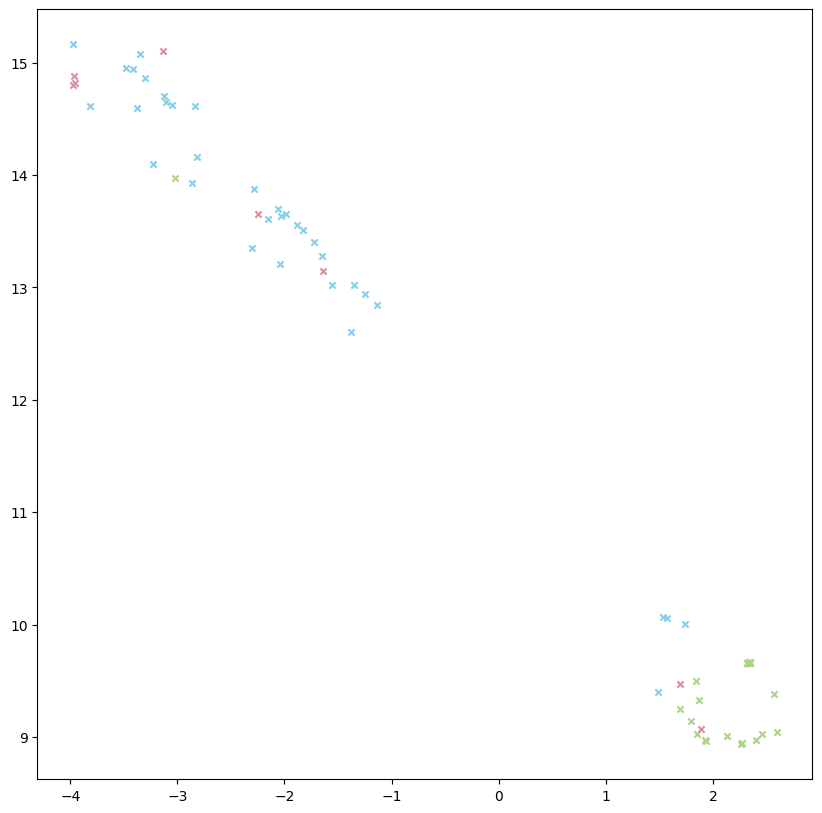

In [16]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
import numpy as np

# Assuming X, plot_data, and plot_labels are defined as before
# Also assuming bool_values is your list/array of boolean values

X = torch.stack(plot_data).cpu().numpy()

# Extract labels for each point
labelsNums = plot_labels

# Perform t-SNE dimensionality reduction
X_embedded = TSNE(n_components=2, init='random').fit_transform(X)

# Assuming 'cc' is a colormap, you might need to adjust this to fit your actual colormap variable
# Generate an array of colors for each label
unique_labels = np.unique(labelsNums)
colors = plt.cm.get_cmap(cc, len(unique_labels))  # Adjust 'cc' as needed to your colormap name
label_to_color = {label: colors(i / len(unique_labels)) for i, label in enumerate(unique_labels)}
colors_array = np.array([label_to_color[label] for label in labelsNums])

# Create the scatter plot
plt.figure(figsize=(10, 10))

# Iterate through each datapoint
for i in range(len(X_embedded)):
    marker = 'x' if short_data_flags[i] else 'o'  # Choose the marker based on the boolean value
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=colors_array[i], s=20, alpha=1, marker=marker)

# Set the background color to black
# plt.gca().set_facecolor('white')
# # Adjust the color of the ticks and labels for better visibility
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# plt.xlabel('Component 1', color='white')
# plt.ylabel('Component 2', color='white')

plt.show()


In [17]:
# Load the CodeBERT tokenizer (adjust the model_name as needed)
model_name = "microsoft/codebert-base"
codebert_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


class SiameseNetwork(nn.Module):
    def __init__(self, embedding_size):
        super(SiameseNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(embedding_size, int(embedding_size/2)),
            nn.ReLU(inplace=True),
            nn.Linear(int(embedding_size/2), int(embedding_size/4)),
            nn.ReLU(inplace=True),
            nn.Linear(int(embedding_size/4), embedding_size)
        )

    def forward(self, x):
        output = self.fc(x)
        return output

In [18]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        distance_positive = (anchor - positive).pow(2).sum(1)
        distance_negative = (anchor - negative).pow(2).sum(1)
        losses = torch.relu(distance_positive - distance_negative + self.margin)
        return losses.mean()

In [19]:
learning_rate = 1e-5
num_epochs = 450
embed_size = m_len  # This should match the output size of CodeBERT
siamese_network = SiameseNetwork(embed_size).to(device)
criterion = TripletLoss(margin=1.0)
optimizer = optim.Adam(siamese_network.parameters(), lr=learning_rate)
triplet_loss = TripletLoss().to(device)

In [20]:
# from transformers import get_linear_schedule_with_warmup
# warmup_Frac = 0.1
# total_iter = num_epochs * len(train_dataloader)
# scheduler = get_linear_schedule_with_warmup(optimizer, int(warmup_Frac * total_iter), total_iter)

In [21]:
from tqdm import tqdm
best_loss = 100.0
num_epochs = 200
epoch_loss_list = []
model_name = "FlakyXbert_IDoFT_project_" + project_name + '_final.pth'
for epoch in range(num_epochs):
    total_loss = 0.0
    siamese_network.train()
    for batch in tqdm(train_dataloader):

        labels = (batch['label']).to(device)
        batch_anchor = (batch['anchor']).to(device)
        batch_positive = (batch['positive']).to(device)
        batch_negative = (batch['negative']).to(device)

        anchor_output = siamese_network(batch_anchor)
        positive_out = siamese_network(batch_positive)
        negative_out = siamese_network(batch_negative)

        loss = criterion(anchor_output, positive_out, negative_out)
        optimizer.zero_grad()
        loss.backward()
        # torch.nn.utils.clip_grad_norm_(siamese_network.parameters(), max_norm=2.0)        
        optimizer.step()
        # scheduler.step()

        total_loss += loss.item()
        if total_loss <= best_loss:
            # print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
            print("Loss improved saving model")
            torch.save(siamese_network.state_dict(), model_name)
            best_loss = total_loss
        
            
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
    # The line `epoch_loss_list.append(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")` is attempting to append a formatted string to a list named `epoch_loss_list`. This string contains information about the current epoch number, total number of epochs, and the average loss calculated for that epoch. However, in the provided code snippet, the `epoch_loss_list` list is not defined or used anywhere else in the code.
    epoch_loss_list.append(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
    

 44%|████▍     | 4/9 [00:00<00:00, 16.40it/s]

Loss improved saving model


100%|██████████| 9/9 [00:00<00:00, 18.54it/s]


Epoch 1/200, Loss: 0.8453924854596456


100%|██████████| 9/9 [00:00<00:00, 18.29it/s]


Epoch 2/200, Loss: 0.753973513841629


100%|██████████| 9/9 [00:00<00:00, 20.20it/s]


Epoch 3/200, Loss: 0.8876802523930868


 22%|██▏       | 2/9 [00:00<00:00, 18.10it/s]

Loss improved saving model


100%|██████████| 9/9 [00:00<00:00, 19.51it/s]


Epoch 4/200, Loss: 0.6970581942134433


100%|██████████| 9/9 [00:00<00:00, 19.47it/s]


Epoch 5/200, Loss: 0.6982079446315765


100%|██████████| 9/9 [00:00<00:00, 20.33it/s]


Epoch 6/200, Loss: 0.669471886422899


100%|██████████| 9/9 [00:00<00:00, 20.39it/s]


Epoch 7/200, Loss: 0.6407409144772424


100%|██████████| 9/9 [00:00<00:00, 20.21it/s]


Epoch 8/200, Loss: 0.4808916416433122


100%|██████████| 9/9 [00:00<00:00, 20.47it/s]


Epoch 9/200, Loss: 0.5324282480610741


100%|██████████| 9/9 [00:00<00:00, 20.24it/s]


Epoch 10/200, Loss: 0.7181838817066617


100%|██████████| 9/9 [00:00<00:00, 20.46it/s]


Epoch 11/200, Loss: 0.6611734396881528


 22%|██▏       | 2/9 [00:00<00:00, 17.11it/s]

Loss improved saving model


100%|██████████| 9/9 [00:00<00:00, 19.87it/s]


Epoch 12/200, Loss: 0.5714124341805776


100%|██████████| 9/9 [00:00<00:00, 20.36it/s]


Epoch 13/200, Loss: 0.5917488071653578


100%|██████████| 9/9 [00:00<00:00, 20.00it/s]


Epoch 14/200, Loss: 0.5307392842239804


100%|██████████| 9/9 [00:00<00:00, 20.28it/s]


Epoch 15/200, Loss: 0.749133848481708


 22%|██▏       | 2/9 [00:00<00:00, 18.31it/s]

Loss improved saving model


100%|██████████| 9/9 [00:00<00:00, 19.97it/s]


Epoch 16/200, Loss: 0.6920530928505791


100%|██████████| 9/9 [00:00<00:00, 20.36it/s]


Epoch 17/200, Loss: 0.5128554718361961


100%|██████████| 9/9 [00:00<00:00, 20.46it/s]


Epoch 18/200, Loss: 0.6446545488304563


100%|██████████| 9/9 [00:00<00:00, 20.44it/s]


Epoch 19/200, Loss: 0.5273209893041186


100%|██████████| 9/9 [00:00<00:00, 19.98it/s]


Epoch 20/200, Loss: 0.5736819439464145


 22%|██▏       | 2/9 [00:00<00:00, 17.90it/s]

Loss improved saving model


100%|██████████| 9/9 [00:00<00:00, 20.22it/s]


Epoch 21/200, Loss: 0.4617569363779492


100%|██████████| 9/9 [00:00<00:00, 20.37it/s]


Epoch 22/200, Loss: 0.5590525203280978


100%|██████████| 9/9 [00:00<00:00, 20.43it/s]


Epoch 23/200, Loss: 0.5975697735945383


100%|██████████| 9/9 [00:00<00:00, 20.04it/s]


Epoch 24/200, Loss: 0.45327264732784694


100%|██████████| 9/9 [00:00<00:00, 19.79it/s]


Epoch 25/200, Loss: 0.5351077930794822


100%|██████████| 9/9 [00:00<00:00, 20.50it/s]


Epoch 26/200, Loss: 0.5909399224652184


100%|██████████| 9/9 [00:00<00:00, 19.98it/s]


Epoch 27/200, Loss: 0.5359810971551471


100%|██████████| 9/9 [00:00<00:00, 19.56it/s]


Epoch 28/200, Loss: 0.5092601113849216


100%|██████████| 9/9 [00:00<00:00, 20.31it/s]


Epoch 29/200, Loss: 0.5948016477955712


100%|██████████| 9/9 [00:00<00:00, 20.42it/s]


Epoch 30/200, Loss: 0.5249263876014285


100%|██████████| 9/9 [00:00<00:00, 20.14it/s]


Epoch 31/200, Loss: 0.5113805631796519


100%|██████████| 9/9 [00:00<00:00, 20.29it/s]


Epoch 32/200, Loss: 0.46936527887980145


100%|██████████| 9/9 [00:00<00:00, 20.21it/s]


Epoch 33/200, Loss: 0.6484311951531304


100%|██████████| 9/9 [00:00<00:00, 20.08it/s]


Epoch 34/200, Loss: 0.5309761034117805


100%|██████████| 9/9 [00:00<00:00, 20.53it/s]


Epoch 35/200, Loss: 0.5378597088985972


100%|██████████| 9/9 [00:00<00:00, 19.83it/s]


Epoch 36/200, Loss: 0.541989439063602


100%|██████████| 9/9 [00:00<00:00, 20.26it/s]


Epoch 37/200, Loss: 0.44828109939893085


100%|██████████| 9/9 [00:00<00:00, 20.25it/s]


Epoch 38/200, Loss: 0.5471729139486948


100%|██████████| 9/9 [00:00<00:00, 20.26it/s]


Epoch 39/200, Loss: 0.4314478851026959


100%|██████████| 9/9 [00:00<00:00, 20.42it/s]


Epoch 40/200, Loss: 0.40503063963519204


100%|██████████| 9/9 [00:00<00:00, 20.37it/s]


Epoch 41/200, Loss: 0.5058812060289912


100%|██████████| 9/9 [00:00<00:00, 20.14it/s]


Epoch 42/200, Loss: 0.45630696084764266


 22%|██▏       | 2/9 [00:00<00:00, 18.17it/s]

Loss improved saving model


100%|██████████| 9/9 [00:00<00:00, 20.09it/s]


Epoch 43/200, Loss: 0.5056614014837477


 22%|██▏       | 2/9 [00:00<00:00, 18.68it/s]

Loss improved saving model


100%|██████████| 9/9 [00:00<00:00, 20.01it/s]


Epoch 44/200, Loss: 0.45928878006007934


100%|██████████| 9/9 [00:00<00:00, 20.01it/s]


Epoch 45/200, Loss: 0.5708884994188944


100%|██████████| 9/9 [00:00<00:00, 20.16it/s]


Epoch 46/200, Loss: 0.44288456357187694


100%|██████████| 9/9 [00:00<00:00, 20.50it/s]


Epoch 47/200, Loss: 0.5460134115484025


100%|██████████| 9/9 [00:00<00:00, 20.21it/s]


Epoch 48/200, Loss: 0.4362720052401225


100%|██████████| 9/9 [00:00<00:00, 20.25it/s]


Epoch 49/200, Loss: 0.5971697221199671


100%|██████████| 9/9 [00:00<00:00, 20.61it/s]


Epoch 50/200, Loss: 0.5841979218853844


100%|██████████| 9/9 [00:00<00:00, 20.21it/s]


Epoch 51/200, Loss: 0.4895246649781863


100%|██████████| 9/9 [00:00<00:00, 20.44it/s]


Epoch 52/200, Loss: 0.47315411435233223


100%|██████████| 9/9 [00:00<00:00, 20.43it/s]


Epoch 53/200, Loss: 0.5262144870228238


100%|██████████| 9/9 [00:00<00:00, 20.21it/s]


Epoch 54/200, Loss: 0.5143627060784234


100%|██████████| 9/9 [00:00<00:00, 20.35it/s]


Epoch 55/200, Loss: 0.524305565489663


100%|██████████| 9/9 [00:00<00:00, 20.26it/s]


Epoch 56/200, Loss: 0.46770307918389636


100%|██████████| 9/9 [00:00<00:00, 20.22it/s]


Epoch 57/200, Loss: 0.5222240818871392


100%|██████████| 9/9 [00:00<00:00, 20.21it/s]


Epoch 58/200, Loss: 0.5231716103023953


100%|██████████| 9/9 [00:00<00:00, 18.57it/s]


Epoch 59/200, Loss: 0.47449280818303424


100%|██████████| 9/9 [00:00<00:00, 20.29it/s]


Epoch 60/200, Loss: 0.4239773684077793


100%|██████████| 9/9 [00:00<00:00, 20.42it/s]


Epoch 61/200, Loss: 0.5312150377366278


100%|██████████| 9/9 [00:00<00:00, 20.47it/s]


Epoch 62/200, Loss: 0.42045167088508606


100%|██████████| 9/9 [00:00<00:00, 20.23it/s]


Epoch 63/200, Loss: 0.39670563737551373


100%|██████████| 9/9 [00:00<00:00, 20.20it/s]


Epoch 64/200, Loss: 0.40465440187189317


100%|██████████| 9/9 [00:00<00:00, 20.47it/s]


Epoch 65/200, Loss: 0.44838784800635445


100%|██████████| 9/9 [00:00<00:00, 20.23it/s]


Epoch 66/200, Loss: 0.595032249059942


100%|██████████| 9/9 [00:00<00:00, 20.10it/s]


Epoch 67/200, Loss: 0.5442249642478095


100%|██████████| 9/9 [00:00<00:00, 20.34it/s]


Epoch 68/200, Loss: 0.5978881162073877


100%|██████████| 9/9 [00:00<00:00, 20.29it/s]


Epoch 69/200, Loss: 0.5393612086772919


100%|██████████| 9/9 [00:00<00:00, 20.38it/s]


Epoch 70/200, Loss: 0.42275437381532455


100%|██████████| 9/9 [00:00<00:00, 20.28it/s]


Epoch 71/200, Loss: 0.5059243241945902


 22%|██▏       | 2/9 [00:00<00:00, 18.25it/s]

Loss improved saving model


100%|██████████| 9/9 [00:00<00:00, 20.06it/s]


Epoch 72/200, Loss: 0.4631311189797189


100%|██████████| 9/9 [00:00<00:00, 20.51it/s]


Epoch 73/200, Loss: 0.3980667425526513


100%|██████████| 9/9 [00:00<00:00, 19.94it/s]


Epoch 74/200, Loss: 0.4409894926680459


100%|██████████| 9/9 [00:00<00:00, 20.28it/s]


Epoch 75/200, Loss: 0.5418185061878629


100%|██████████| 9/9 [00:00<00:00, 19.86it/s]


Epoch 76/200, Loss: 0.5166187187035879


100%|██████████| 9/9 [00:00<00:00, 20.33it/s]


Epoch 77/200, Loss: 0.49422937466038597


100%|██████████| 9/9 [00:00<00:00, 20.26it/s]


Epoch 78/200, Loss: 0.4084679161508878


100%|██████████| 9/9 [00:00<00:00, 20.22it/s]


Epoch 79/200, Loss: 0.5071777221229341


100%|██████████| 9/9 [00:00<00:00, 20.30it/s]


Epoch 80/200, Loss: 0.44722334875000846


100%|██████████| 9/9 [00:00<00:00, 20.32it/s]


Epoch 81/200, Loss: 0.4509812576903237


100%|██████████| 9/9 [00:00<00:00, 20.43it/s]


Epoch 82/200, Loss: 0.3948700494236416


100%|██████████| 9/9 [00:00<00:00, 20.19it/s]


Epoch 83/200, Loss: 0.40986430479420555


100%|██████████| 9/9 [00:00<00:00, 20.24it/s]


Epoch 84/200, Loss: 0.3608988929125998


100%|██████████| 9/9 [00:00<00:00, 19.40it/s]


Epoch 85/200, Loss: 0.3679248301519288


100%|██████████| 9/9 [00:00<00:00, 19.90it/s]


Epoch 86/200, Loss: 0.3246977842516369


100%|██████████| 9/9 [00:00<00:00, 20.38it/s]


Epoch 87/200, Loss: 0.5366157988707224


100%|██████████| 9/9 [00:00<00:00, 20.44it/s]


Epoch 88/200, Loss: 0.6066234012444814


100%|██████████| 9/9 [00:00<00:00, 20.44it/s]


Epoch 89/200, Loss: 0.4619481894705031


100%|██████████| 9/9 [00:00<00:00, 20.42it/s]


Epoch 90/200, Loss: 0.5297355287604861


100%|██████████| 9/9 [00:00<00:00, 20.02it/s]


Epoch 91/200, Loss: 0.5247924700379372


100%|██████████| 9/9 [00:00<00:00, 20.34it/s]


Epoch 92/200, Loss: 0.4219418300522698


100%|██████████| 9/9 [00:00<00:00, 20.39it/s]


Epoch 93/200, Loss: 0.45172811465130913


100%|██████████| 9/9 [00:00<00:00, 20.56it/s]


Epoch 94/200, Loss: 0.47992773685190415


100%|██████████| 9/9 [00:00<00:00, 20.34it/s]


Epoch 95/200, Loss: 0.5872282452053494


100%|██████████| 9/9 [00:00<00:00, 20.29it/s]


Epoch 96/200, Loss: 0.37242764482895535


 22%|██▏       | 2/9 [00:00<00:00, 17.89it/s]

Loss improved saving model


100%|██████████| 9/9 [00:00<00:00, 19.92it/s]


Epoch 97/200, Loss: 0.3376549490624004


100%|██████████| 9/9 [00:00<00:00, 20.26it/s]


Epoch 98/200, Loss: 0.42282060782114667


100%|██████████| 9/9 [00:00<00:00, 20.03it/s]


Epoch 99/200, Loss: 0.35268034206496346


100%|██████████| 9/9 [00:00<00:00, 20.02it/s]


Epoch 100/200, Loss: 0.4126678804556529


100%|██████████| 9/9 [00:00<00:00, 20.01it/s]


Epoch 101/200, Loss: 0.4691001988119549


100%|██████████| 9/9 [00:00<00:00, 20.26it/s]


Epoch 102/200, Loss: 0.5243090391159058


100%|██████████| 9/9 [00:00<00:00, 20.34it/s]


Epoch 103/200, Loss: 0.38366169068548417


100%|██████████| 9/9 [00:00<00:00, 20.11it/s]


Epoch 104/200, Loss: 0.33988070156839156


100%|██████████| 9/9 [00:00<00:00, 20.44it/s]


Epoch 105/200, Loss: 0.4235500312513775


100%|██████████| 9/9 [00:00<00:00, 20.41it/s]


Epoch 106/200, Loss: 0.42907557967636323


100%|██████████| 9/9 [00:00<00:00, 20.20it/s]


Epoch 107/200, Loss: 0.4262957415646977


100%|██████████| 9/9 [00:00<00:00, 20.51it/s]


Epoch 108/200, Loss: 0.4195891155136956


100%|██████████| 9/9 [00:00<00:00, 20.34it/s]


Epoch 109/200, Loss: 0.45609576337867314


100%|██████████| 9/9 [00:00<00:00, 20.01it/s]


Epoch 110/200, Loss: 0.5000165700912476


100%|██████████| 9/9 [00:00<00:00, 20.10it/s]


Epoch 111/200, Loss: 0.35590048051542705


100%|██████████| 9/9 [00:00<00:00, 20.57it/s]


Epoch 112/200, Loss: 0.40690156983004677


100%|██████████| 9/9 [00:00<00:00, 20.36it/s]


Epoch 113/200, Loss: 0.3390382147497601


100%|██████████| 9/9 [00:00<00:00, 20.48it/s]


Epoch 114/200, Loss: 0.3827553656366136


100%|██████████| 9/9 [00:00<00:00, 20.06it/s]


Epoch 115/200, Loss: 0.418082520365715


100%|██████████| 9/9 [00:00<00:00, 18.61it/s]


Epoch 116/200, Loss: 0.44473809334966874


100%|██████████| 9/9 [00:00<00:00, 19.63it/s]


Epoch 117/200, Loss: 0.3649888303544786


100%|██████████| 9/9 [00:00<00:00, 19.06it/s]


Epoch 118/200, Loss: 0.4103207273615731


100%|██████████| 9/9 [00:00<00:00, 20.09it/s]


Epoch 119/200, Loss: 0.27600838740666706


100%|██████████| 9/9 [00:00<00:00, 20.21it/s]


Epoch 120/200, Loss: 0.5008842026193937


100%|██████████| 9/9 [00:00<00:00, 20.46it/s]


Epoch 121/200, Loss: 0.3524649673038059


100%|██████████| 9/9 [00:00<00:00, 20.51it/s]


Epoch 122/200, Loss: 0.4591584727168083


100%|██████████| 9/9 [00:00<00:00, 20.30it/s]


Epoch 123/200, Loss: 0.291583604282803


 22%|██▏       | 2/9 [00:00<00:00, 17.65it/s]

Loss improved saving model


100%|██████████| 9/9 [00:00<00:00, 19.87it/s]


Epoch 124/200, Loss: 0.23687938269641665


100%|██████████| 9/9 [00:00<00:00, 20.59it/s]


Epoch 125/200, Loss: 0.3369898936814732


100%|██████████| 9/9 [00:00<00:00, 20.18it/s]


Epoch 126/200, Loss: 0.36420046703683007


100%|██████████| 9/9 [00:00<00:00, 20.38it/s]


Epoch 127/200, Loss: 0.3557225532001919


100%|██████████| 9/9 [00:00<00:00, 19.94it/s]


Epoch 128/200, Loss: 0.31728565444548923


100%|██████████| 9/9 [00:00<00:00, 17.82it/s]


Epoch 129/200, Loss: 0.31517429153124493


100%|██████████| 9/9 [00:00<00:00, 20.09it/s]


Epoch 130/200, Loss: 0.40983352561791736


100%|██████████| 9/9 [00:00<00:00, 20.04it/s]


Epoch 131/200, Loss: 0.46405239237679374


100%|██████████| 9/9 [00:00<00:00, 20.01it/s]


Epoch 132/200, Loss: 0.35473210944069755


100%|██████████| 9/9 [00:00<00:00, 19.98it/s]


Epoch 133/200, Loss: 0.5203058471282324


100%|██████████| 9/9 [00:00<00:00, 19.66it/s]


Epoch 134/200, Loss: 0.31135095324781203


100%|██████████| 9/9 [00:00<00:00, 20.29it/s]


Epoch 135/200, Loss: 0.3782827655474345


100%|██████████| 9/9 [00:00<00:00, 20.02it/s]


Epoch 136/200, Loss: 0.2661162738998731


100%|██████████| 9/9 [00:00<00:00, 19.45it/s]


Epoch 137/200, Loss: 0.346772422393163


 22%|██▏       | 2/9 [00:00<00:00, 18.02it/s]

Loss improved saving model


100%|██████████| 9/9 [00:00<00:00, 19.73it/s]


Epoch 138/200, Loss: 0.4254662096500397


100%|██████████| 9/9 [00:00<00:00, 19.03it/s]


Epoch 139/200, Loss: 0.2427038765615887


100%|██████████| 9/9 [00:00<00:00, 18.15it/s]


Epoch 140/200, Loss: 0.3956469843784968


100%|██████████| 9/9 [00:00<00:00, 19.93it/s]


Epoch 141/200, Loss: 0.26814480788177913


 22%|██▏       | 2/9 [00:00<00:00, 14.90it/s]

Loss improved saving model


100%|██████████| 9/9 [00:00<00:00, 18.23it/s]


Epoch 142/200, Loss: 0.3370426247517268


100%|██████████| 9/9 [00:00<00:00, 20.22it/s]


Epoch 143/200, Loss: 0.3422168617447217


100%|██████████| 9/9 [00:00<00:00, 19.78it/s]


Epoch 144/200, Loss: 0.302030634548929


100%|██████████| 9/9 [00:00<00:00, 19.57it/s]


Epoch 145/200, Loss: 0.40283629463778603


100%|██████████| 9/9 [00:00<00:00, 19.85it/s]


Epoch 146/200, Loss: 0.39641403820779586


100%|██████████| 9/9 [00:00<00:00, 20.12it/s]


Epoch 147/200, Loss: 0.3801940422919061


100%|██████████| 9/9 [00:00<00:00, 20.09it/s]


Epoch 148/200, Loss: 0.24070504390531117


100%|██████████| 9/9 [00:00<00:00, 20.03it/s]


Epoch 149/200, Loss: 0.31514401237169903


100%|██████████| 9/9 [00:00<00:00, 19.76it/s]


Epoch 150/200, Loss: 0.42539768583244747


100%|██████████| 9/9 [00:00<00:00, 20.49it/s]


Epoch 151/200, Loss: 0.334563451508681


100%|██████████| 9/9 [00:00<00:00, 20.20it/s]


Epoch 152/200, Loss: 0.2892380605141322


100%|██████████| 9/9 [00:00<00:00, 20.38it/s]


Epoch 153/200, Loss: 0.46489159928427803


100%|██████████| 9/9 [00:00<00:00, 20.53it/s]


Epoch 154/200, Loss: 0.332316549287902


100%|██████████| 9/9 [00:00<00:00, 20.40it/s]


Epoch 155/200, Loss: 0.2886265814304352


100%|██████████| 9/9 [00:00<00:00, 20.43it/s]


Epoch 156/200, Loss: 0.2859112471342087


100%|██████████| 9/9 [00:00<00:00, 20.54it/s]


Epoch 157/200, Loss: 0.3771623687611686


100%|██████████| 9/9 [00:00<00:00, 20.02it/s]


Epoch 158/200, Loss: 0.31214166018697953


100%|██████████| 9/9 [00:00<00:00, 20.41it/s]


Epoch 159/200, Loss: 0.3632005684905582


100%|██████████| 9/9 [00:00<00:00, 20.32it/s]


Epoch 160/200, Loss: 0.35945539507601


100%|██████████| 9/9 [00:00<00:00, 20.33it/s]


Epoch 161/200, Loss: 0.3156890488333172


100%|██████████| 9/9 [00:00<00:00, 20.35it/s]


Epoch 162/200, Loss: 0.3753709743420283


100%|██████████| 9/9 [00:00<00:00, 20.35it/s]


Epoch 163/200, Loss: 0.3259162480632464


100%|██████████| 9/9 [00:00<00:00, 20.62it/s]


Epoch 164/200, Loss: 0.25723356505235034


100%|██████████| 9/9 [00:00<00:00, 20.50it/s]


Epoch 165/200, Loss: 0.2978588996662034


100%|██████████| 9/9 [00:00<00:00, 20.32it/s]


Epoch 166/200, Loss: 0.3117006652885013


100%|██████████| 9/9 [00:00<00:00, 19.79it/s]


Epoch 167/200, Loss: 0.3674410763714049


100%|██████████| 9/9 [00:00<00:00, 19.29it/s]


Epoch 168/200, Loss: 0.32487225698100197


100%|██████████| 9/9 [00:00<00:00, 19.31it/s]


Epoch 169/200, Loss: 0.2980684894654486


100%|██████████| 9/9 [00:00<00:00, 20.36it/s]


Epoch 170/200, Loss: 0.29950474782122505


100%|██████████| 9/9 [00:00<00:00, 19.52it/s]


Epoch 171/200, Loss: 0.2862892871101697


100%|██████████| 9/9 [00:00<00:00, 18.64it/s]


Epoch 172/200, Loss: 0.29326336913638645


100%|██████████| 9/9 [00:00<00:00, 20.39it/s]


Epoch 173/200, Loss: 0.2986139588885837


100%|██████████| 9/9 [00:00<00:00, 20.38it/s]


Epoch 174/200, Loss: 0.3192755604783694


100%|██████████| 9/9 [00:00<00:00, 20.48it/s]


Epoch 175/200, Loss: 0.24519798987441593


100%|██████████| 9/9 [00:00<00:00, 20.41it/s]


Epoch 176/200, Loss: 0.2855314215024312


100%|██████████| 9/9 [00:00<00:00, 20.55it/s]


Epoch 177/200, Loss: 0.30037735899289447


100%|██████████| 9/9 [00:00<00:00, 20.32it/s]


Epoch 178/200, Loss: 0.335483618080616


100%|██████████| 9/9 [00:00<00:00, 20.41it/s]


Epoch 179/200, Loss: 0.2065194845199585


100%|██████████| 9/9 [00:00<00:00, 20.36it/s]


Epoch 180/200, Loss: 0.41069169176949394


100%|██████████| 9/9 [00:00<00:00, 19.99it/s]


Epoch 181/200, Loss: 0.23562362624539268


100%|██████████| 9/9 [00:00<00:00, 20.34it/s]


Epoch 182/200, Loss: 0.3176794797182083


100%|██████████| 9/9 [00:00<00:00, 20.22it/s]


Epoch 183/200, Loss: 0.2958315544658237


100%|██████████| 9/9 [00:00<00:00, 19.58it/s]


Epoch 184/200, Loss: 0.33313631928629345


100%|██████████| 9/9 [00:00<00:00, 20.65it/s]


Epoch 185/200, Loss: 0.2171773976749844


100%|██████████| 9/9 [00:00<00:00, 20.03it/s]


Epoch 186/200, Loss: 0.39247748255729675


100%|██████████| 9/9 [00:00<00:00, 20.42it/s]


Epoch 187/200, Loss: 0.4063046971956889


100%|██████████| 9/9 [00:00<00:00, 20.16it/s]


Epoch 188/200, Loss: 0.323527486787902


100%|██████████| 9/9 [00:00<00:00, 19.13it/s]


Epoch 189/200, Loss: 0.23557047545909882


100%|██████████| 9/9 [00:00<00:00, 20.53it/s]


Epoch 190/200, Loss: 0.28183187544345856


100%|██████████| 9/9 [00:00<00:00, 19.88it/s]


Epoch 191/200, Loss: 0.28855304999483955


100%|██████████| 9/9 [00:00<00:00, 20.02it/s]


Epoch 192/200, Loss: 0.27658431066407096


100%|██████████| 9/9 [00:00<00:00, 18.48it/s]


Epoch 193/200, Loss: 0.299466061923239


100%|██████████| 9/9 [00:00<00:00, 20.32it/s]


Epoch 194/200, Loss: 0.2942667288912667


100%|██████████| 9/9 [00:00<00:00, 20.02it/s]


Epoch 195/200, Loss: 0.37391189568572575


100%|██████████| 9/9 [00:00<00:00, 19.01it/s]


Epoch 196/200, Loss: 0.38408661633729935


100%|██████████| 9/9 [00:00<00:00, 19.87it/s]


Epoch 197/200, Loss: 0.2500685751438141


100%|██████████| 9/9 [00:00<00:00, 18.66it/s]


Epoch 198/200, Loss: 0.2644144594669342


100%|██████████| 9/9 [00:00<00:00, 20.34it/s]


Epoch 199/200, Loss: 0.23624657922320896


100%|██████████| 9/9 [00:00<00:00, 19.91it/s]

Epoch 200/200, Loss: 0.24094588723447588


In [22]:
epoch_loss_list[-50:-20]

['Epoch 151/200, Loss: 0.334563451508681',
 'Epoch 152/200, Loss: 0.2892380605141322',
 'Epoch 153/200, Loss: 0.46489159928427803',
 'Epoch 154/200, Loss: 0.332316549287902',
 'Epoch 155/200, Loss: 0.2886265814304352',
 'Epoch 156/200, Loss: 0.2859112471342087',
 'Epoch 157/200, Loss: 0.3771623687611686',
 'Epoch 158/200, Loss: 0.31214166018697953',
 'Epoch 159/200, Loss: 0.3632005684905582',
 'Epoch 160/200, Loss: 0.35945539507601',
 'Epoch 161/200, Loss: 0.3156890488333172',
 'Epoch 162/200, Loss: 0.3753709743420283',
 'Epoch 163/200, Loss: 0.3259162480632464',
 'Epoch 164/200, Loss: 0.25723356505235034',
 'Epoch 165/200, Loss: 0.2978588996662034',
 'Epoch 166/200, Loss: 0.3117006652885013',
 'Epoch 167/200, Loss: 0.3674410763714049',
 'Epoch 168/200, Loss: 0.32487225698100197',
 'Epoch 169/200, Loss: 0.2980684894654486',
 'Epoch 170/200, Loss: 0.29950474782122505',
 'Epoch 171/200, Loss: 0.2862892871101697',
 'Epoch 172/200, Loss: 0.29326336913638645',
 'Epoch 173/200, Loss: 0.29861

In [23]:
siamese_network.load_state_dict(torch.load(model_name))


<All keys matched successfully>

In [24]:
siamese_network.to(device).eval()
post_train_embed = []
post_train_label = []
with torch.no_grad():
    for item in tqdm(train_dataset):
        post_train_embed.append(siamese_network(item['anchor']))
        post_train_label.append(item['label'])

 23%|██▎       | 15/66 [00:00<00:00, 142.49it/s]

100%|██████████| 66/66 [00:00<00:00, 148.17it/s]


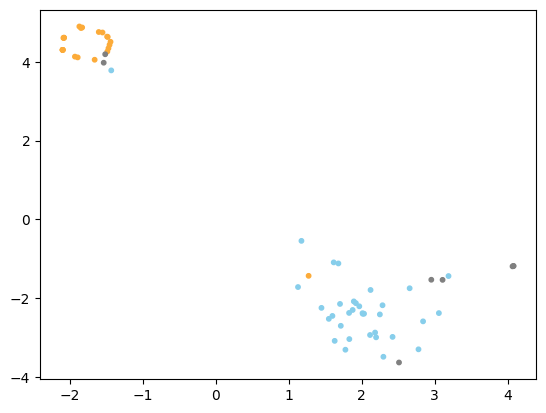

In [25]:
%matplotlib inline

X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
labelsNums = post_train_label
X_embedded= TSNE(n_components=2, init='random').fit_transform(X_np)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1] , c=labelsNums[:len(X_embedded)], s=10, cmap= cc , alpha=1 )


In [26]:
def clsembed(snippet):
    inputs = tokenizer(snippet, padding='max_length', max_length=218, truncation=True, return_tensors='pt').to(device)
    #tokens = [self.tokenizer.cls_token] + inputs  + [self.tokenizer.sep_token]
    if(len(inputs)<512):
        with torch.no_grad():
            outs = model_codebert(**inputs)
        cls = outs.last_hidden_state[:, 0, :].squeeze().detach()
        return cls
    else:
        print('longtest')
        i = 0
        part_vector =  []
        while ( i < len(inputs)-200) :
            #tokens = [self.tokenizer.cls_token] + inputs[i:i+250] +[self.tokenizer.sep_token]
            #tokens_ids= self.tokenizer.convert_tokens_to_ids(tokens)
            input_seg = [tokenizer.cls_token] + inputs[i:i+250] +[tokenizer.sep_token]
            with torch.no_grad():
                ots = model_codebert(**input_seg)
            cls = ots.last_hidden_state[:, 0, :].squeeze().detach()
            #cls = model_codebert(torch.tensor(inputs)[None,:])[1]
            #vector = cls[0].detach().numpy()
            parts.append(cls)
            i = i+100
        return parts

In [27]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
#labels_all = ['async wait','unordered collections','concurrency','time']
def get_class_rep(post_train_embed, post_train_label):
    # Move each tensor to CPU, convert to numpy, and collect in a list
    #post_train_embed = [x.cpu().numpy() for x in post_train_embed]
    # If you want to combine them into a single array (assuming they have the same shape)
    #post_train_embed = np.concatenate(post_train_embed, axis=0)
    representatives = [None] * 3
    for label in range(3):
        indices = np.where(np.atleast_1d(post_train_label) == label)[0]  # Get the indices as an array
        class_vectors = [post_train_embed[i] for i in indices]  # Access each index individually
        class_vectors = [x.cpu().numpy() for x in class_vectors]
        representatives[label] = np.mean(class_vectors, axis=0)
    return representatives

def calculate_normalized_distance(vec1, vec2):
    # Ensure vec1 and vec2 are numpy arrays
    if not isinstance(vec1, np.ndarray):
        vec1 = vec1.cpu().detach().numpy()
    if not isinstance(vec2, np.ndarray):
        vec2 = vec2.cpu().detach().numpy()
    
    # Normalize each vector to have unit length
    norm_vec1 = vec1 / np.linalg.norm(vec1)
    norm_vec2 = vec2 / np.linalg.norm(vec2)
    
    # Calculate Euclidean (L2) distance between the normalized vectors
    distance = np.linalg.norm(norm_vec1 - norm_vec2)
    
    return distance


In [28]:
int_to_label={
    0: 'ID',
    1: 'NDOD',
    2: 'UD'
}


def get_closest_cluster(cluster_representatives, projected_vector):
    distances = [calculate_normalized_distance(rep, projected_vector) for rep in cluster_representatives]
    for i in range(len(distances)):
        distances[i] = np.mean(distances[i])
    closest_cluster_idx = np.argmin(distances)
    return int_to_label[closest_cluster_idx]

In [29]:
embed = post_train_embed
labels = post_train_label
def predict(input_vector):
    modified_vector = siamese_network(input_vector)
    representatives = get_class_rep(embed, labels)
    return get_closest_cluster(representatives, modified_vector)
    


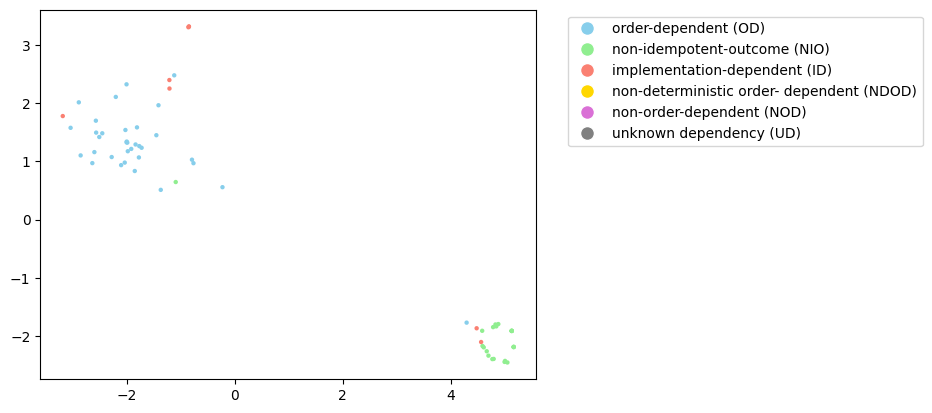

In [30]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

# Assuming post_train_embed and post_train_label are defined
X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
labelsNums = post_train_label

# Define vibrant colors for each category (same as used in the bar plot)
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']

# Ensure labels are within the range of colors [0, 1, 2, 3, 4]
# Filter out invalid labels (-1) and keep only valid labels [0, 1, 2, 3, 4]
valid_indices = [i for i, label in enumerate(labelsNums) if label in [ 0, 1, 2]]
X_np_filtered = X_np[valid_indices]
labelsNums_filtered = [labelsNums[i] for i in valid_indices]

# Dimensionality reduction with t-SNE
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_np_filtered)

# Scatter plot
for i, label in enumerate(labelsNums_filtered):
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=colors[label], s=10, alpha=1, edgecolor='none', marker='o')

# Create legend with category labels
legend_labels = ['order-dependent (OD)', 'non-idempotent-outcome (NIO)', 'implementation-dependent (ID)', 'non-deterministic order- dependent (NDOD)', 'non-order-dependent (NOD)', 'unknown dependency (UD)']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors], labels=legend_labels,bbox_to_anchor=(1.05, 1), 
                    loc='upper left')

plt.show()


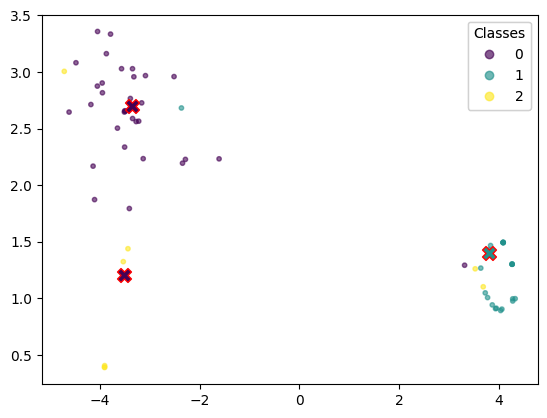

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import torch

# Assuming post_train_embed, post_train_label, and labelsNums are defined
X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_np)

# Plot the data points
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labelsNums[:len(X_embedded)], s=10, cmap='viridis', alpha=0.6)

# Calculate class representatives
representatives = get_class_rep(post_train_embed, post_train_label)  # Make sure this function returns what you expect

# Get unique labels and their colors from the scatter plot
unique_labels = np.unique(labelsNums[:len(X_embedded)])
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

# For each class representative, find the closest point and plot it
for i, rep in enumerate(representatives):
    if rep is not None:
        # Find the closest data point in the original space to this representative
        distances = np.linalg.norm(X_np - rep, axis=1)
        closest_point_index = np.argmin(distances)
        # Use the label of the closest data point to get the correct color
        label_of_closest = labelsNums[closest_point_index]
        color = scatter.cmap(scatter.norm(label_of_closest))
        plt.scatter(X_embedded[closest_point_index, 0], X_embedded[closest_point_index, 1], color=color, edgecolors='red', s=100, marker='X')

# You might want to adjust the legend to make sure it correctly represents your data
# plt.legend()
plt.show()


In [32]:
# from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# # Assuming 'X_embedded' is your t-SNE result and 'labelsNums' are your labels

# # Silhouette Score:
# # - Measures how similar an object is to its own cluster compared to other clusters.
# # - Range: -1 (incorrect clustering) to 1 (highly dense clustering). 
# #   A score close to 1 means that the clusters are well separated and clearly defined.
# silhouette_avg = silhouette_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Silhouette Score: {silhouette_avg}")

# # Davies-Bouldin Index:
# # - Evaluates the clustering quality by measuring the average 'similarity' between each cluster 
# #   and its most similar one. The similarity is based on a ratio of within-cluster distances to between-cluster distances.
# # - Range: 0 to +∞. Lower scores indicate better clustering quality.
# davies_bouldin = davies_bouldin_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Davies-Bouldin Index: {davies_bouldin}")

# # Calinski-Harabasz Index:
# # - Measures the cluster validity based on the ratio between the within-cluster dispersion and the between-cluster dispersion.
# # - Range: Higher values indicate better clustering quality, with no upper limit. Low values indicate clusters with high overlap.
# calinski_harabasz = calinski_harabasz_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Calinski-Harabasz Index: {calinski_harabasz}")


In [33]:
from sklearn.metrics import f1_score
 # Create reverse mapping

count = 0

# Assuming val_dataset is iterable and has 'anchor' and 'label' keys
predicted_labels = []
true_labels = []

for item in val_dataset:
    count += 1
    input_vector = item['anchor']  # Your input vector for prediction
    
    # Get predicted cluster/label
    predicted_label_str = predict(input_vector)
    
    # Ensure predicted_label is in the valid range
    if predicted_label_str in label_to_int:
        predicted_label = label_to_int[predicted_label_str]
        predicted_labels.append(predicted_label)
    else:
        print(f"Warning: Encountered unknown predicted label {predicted_label_str}")
        continue

    # True label
    true_label_int = int(item['label'])  # Assuming 'label' contains the true label as integer
    if true_label_int in int_to_label:
        true_labels.append(true_label_int)
    else:
        print(f"Warning: Encountered unknown true label {true_label_int}")
        continue

    print(count, "Predicted:", predicted_label, "True:", true_label_int)

# Filter out any invalid entries where predicted or true labels are missing
valid_indices = [i for i in range(len(true_labels)) if true_labels[i] in int_to_label and predicted_labels[i] in int_to_label]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_predicted_labels = [predicted_labels[i] for i in valid_indices]

print("Loop completed")

# Calculate F1 Score, ignoring unknown labels
f1 = f1_score(filtered_true_labels, filtered_predicted_labels, average='weighted', zero_division=0)  # Adjust 'average' as necessary
print(f"F1 Score: {f1}")


1 Predicted: 0 True: 0
2 Predicted: 1 True: 1
3 Predicted: 2 True: 0
4 Predicted: 1 True: 0
5 Predicted: 0 True: 0
6 Predicted: 1 True: 1
7 Predicted: 0 True: 0
8 Predicted: 1 True: 1
9 Predicted: 0 True: 0
10 Predicted: 0 True: 0
11 Predicted: 0 True: 2
12 Predicted: 0 True: 0
13 Predicted: 1 True: 2
14 Predicted: 1 True: 1
15 Predicted: 1 True: 1
16 Predicted: 1 True: 1
17 Predicted: 0 True: 0
Loop completed
F1 Score: 0.7385071675729113


              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.75      1.00      0.86         6
           2       0.00      0.00      0.00         2

    accuracy                           0.76        17
   macro avg       0.54      0.59      0.56        17
weighted avg       0.73      0.76      0.74        17


 - Accuracy :  0.76
 - Precision :  0.73
 - Recall :  0.76
 - F1 score :  0.74
 - MCC :  0.6
 - AUC :  0.81


Performances by categories



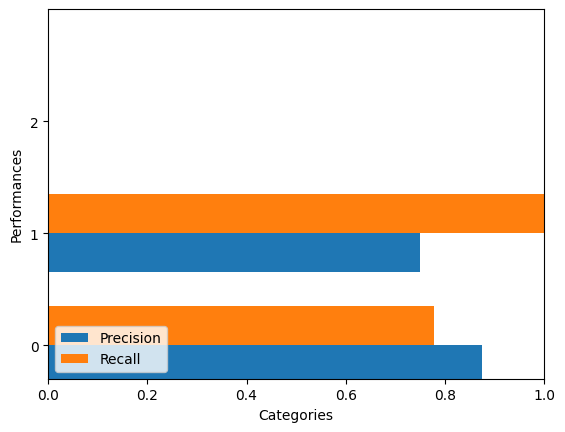



Confusion Matrix 


<AxesSubplot:>

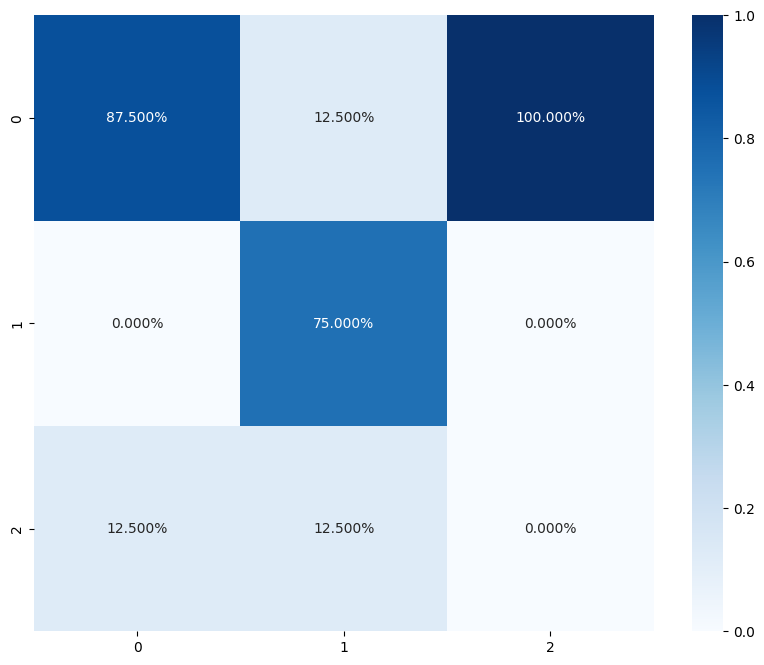

In [34]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

%matplotlib inline
warnings.filterwarnings("ignore")

def multiclass_roc_auc_score(truth, pred, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(truth)
    truth = lb.transform(truth)
    pred = lb.transform(pred)
    return roc_auc_score(truth, pred, average=average)

# Assuming predicted_labels and true_labels are already defined
predicted = predicted_labels
labels = true_labels

# Filter out 'unknown' labels
valid_indices = [i for i, label in enumerate(labels) if label != 'unknown']
filtered_labels = [labels[i] for i in valid_indices]
filtered_predicted = [predicted[i] for i in valid_indices]

unique_labels = list(set(filtered_labels))
print(classification_report(filtered_labels, filtered_predicted))

print('\n - Accuracy : ', np.round(metrics.accuracy_score(filtered_labels, filtered_predicted), 2))
print(' - Precision : ', np.round(metrics.precision_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - Recall : ', np.round(metrics.recall_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - F1 score : ', np.round(metrics.f1_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - MCC : ', np.round(metrics.matthews_corrcoef(filtered_labels, filtered_predicted), 2))
print(' - AUC : ', np.round(multiclass_roc_auc_score(filtered_labels, filtered_predicted), 2))

print("\n\nPerformances by categories\n")

ind = np.arange(len(unique_labels)) 
width = 0.35
fig, ax = plt.subplots()
precision = metrics.precision_recall_fscore_support(filtered_labels, filtered_predicted, labels=unique_labels)[0]
recall = metrics.precision_recall_fscore_support(filtered_labels, filtered_predicted, labels=unique_labels)[1]
ax.barh(ind - width/2, precision, width, label='Precision')
ax.barh(ind + width/2, recall, width, label='Recall')
ax.set(yticks=ind, yticklabels=np.array(unique_labels), ylim=[2*width - 1, len(ind)])
plt.xlim(0, 1)
ax.legend(loc='lower left')
ax.set_ylabel("Performances")
ax.set_xlabel("Categories")
plt.show()

print("\n\nConfusion Matrix ")

mat = confusion_matrix(filtered_labels, filtered_predicted, labels=unique_labels)
df_cm = pd.DataFrame(mat, index=[i for i in unique_labels], columns=[i for i in unique_labels])
plt.figure(figsize=(10, 8))
sn.heatmap(df_cm / np.sum(df_cm), annot=True, fmt='.3%', cmap='Blues')


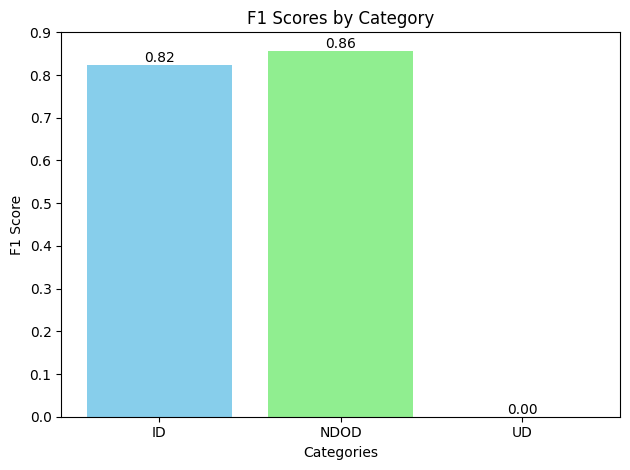

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
shortened_labels = {
    'OD': 'OD',
    'NIO': 'NIO',
    'ID': 'ID',
    'NDOD': 'NDOD',
    'NOD': 'NOD',
    'UD': 'UD'
}
# Assuming you have the predicted and true labels as per your previous code
# predicted_labels and true_labels should be lists of labels
# Filter out invalid labels from both true and predicted labels
valid_indices = [i for i in range(len(true_labels)) if true_labels[i] in int_to_label.keys() and predicted_labels[i] in int_to_label.keys()]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_predicted_labels = [predicted_labels[i] for i in valid_indices]

# Calculate F1 scores for each category
f1_scores = []
categories = list(int_to_label.keys())
for category in categories:
    true_bin = [1 if label == category else 0 for label in filtered_true_labels]
    pred_bin = [1 if label == category else 0 for label in filtered_predicted_labels]
    f1 = f1_score(true_bin, pred_bin, zero_division=0)
    f1_scores.append(f1)

# Define vibrant colors for each category
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']

# Create bar plot with shortened category names and vibrant colors
shortened_categories = [shortened_labels[int_to_label[category]] for category in categories]
fig, ax = plt.subplots()
bars = ax.bar(shortened_categories, f1_scores, color=colors)

# Add F1 scores on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 0),  
                textcoords="offset points", ha='center', va='bottom')

# Customize the plot
ax.set_xlabel('Categories')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores by Category')

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [36]:
# file_path = 'test_data_predictions.csv'

# # Load the compressed CSV file into a DataFrame
# df = pd.read_csv(file_path)

# # Extract the 'TrueLabel' and 'PredictedLabel' columns into separate variables
# labels_flaky = df['TrueLabel'].tolist()
# predicted_flaky = df['PredictedLabel'].tolist()

# print (classification_report(labels, predicted))

# print('\n - Accuracy : ' , np.round( metrics.accuracy_score(labels_flaky,  predicted_flaky) , 2))
# print(' - Precision : ' , np.round( metrics.precision_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - Recall : ' , np.round( metrics.recall_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - F1 score : ' , np.round( metrics.f1_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - MCC : ' , np.round( metrics.matthews_corrcoef(labels_flaky,  predicted_flaky) , 2))
# print(' - AUC : ' , np.round( multiclass_roc_auc_score(labels_flaky,  predicted_flaky),2) )

# print("\n\nPerfomnaces by categories\n")


# ind = np.arange(len(unique_labels)) 
# width = 0.35
# fig, ax = plt.subplots()
# precision = metrics.precision_recall_fscore_support(labels_flaky,  predicted_flaky ,  labels=unique_labels )[0]
# recall = metrics.precision_recall_fscore_support(labels_flaky,  predicted_flaky ,  labels=unique_labels )[1]
# ax.barh(ind - width/2, precision, width, label='Precision')
# ax.barh(ind + width/2, recall, width, label='Recall')
# ax.set(yticks=ind + width, yticklabels=np.array(unique_labels),
# ylim=[2*width - 1, len(ind)])
# plt.xlim(0,1)
# ax.legend(loc='upper right')
# ax.set_xlabel("Performances")
# ax.set_ylabel("Categories")
# plt.show()

# print("\n\nConfusion Matrix ")

# mat = confusion_matrix(labels_flaky,  predicted_flaky, labels=unique_labels)
# df_cm = pd.DataFrame(mat, index = [i for i in unique_labels], columns = [i for i in unique_labels])
# plt.figure(figsize = (10,8))
# sn.heatmap(df_cm/np.sum(df_cm), annot=True, fmt='.3%', cmap='Blues')

In [37]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn import metrics

# precision_our_model = metrics.precision_recall_fscore_support(labels, predicted, labels=unique_labels)[0]
# recall_our_model = metrics.precision_recall_fscore_support(labels, predicted, labels=unique_labels)[1]
# # And assuming 'unique_labels' is defined as before

# ind = np.arange(len(unique_labels))  # the x locations for the groups
# width = 0.2  # the width of the bars

# fig, ax = plt.subplots(figsize=(14, 10))  # Adjust the figure size as needed

# # Using a set of contrasting, darker colors
# colors = ['blue', 'green', 'red', 'orange']

# # Plotting Precision and Recall for Your Model
# rects1 = ax.bar(ind - width*1.5, precision_our_model, width, label='Our Precision', color=colors[0])
# rects2 = ax.bar(ind - width/2, recall_our_model, width, label='Our Recall', color=colors[1])

# # Plotting Precision and Recall for Flaky Model
# rects3 = ax.bar(ind + width/2, precision_flaky, width, label='FlakyCat Precision', color=colors[2])
# rects4 = ax.bar(ind + width*1.5, recall_flaky, width, label='FlakyCat Recall', color=colors[3])

# # Add some text for labels, title, and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Class-wise Precision and Recall for Our Model vs. FlakyCat Model')
# ax.set_xticks(ind)
# ax.set_xticklabels(unique_labels, rotation=45, ha="right")  # Rotate for better label visibility
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside the figure

# # Optional: Adding scores above bars
# ax.bar_label(rects1, padding=3, fmt='%.2f')
# ax.bar_label(rects2, padding=3, fmt='%.2f')
# ax.bar_label(rects3, padding=3, fmt='%.2f')
# ax.bar_label(rects4, padding=3, fmt='%.2f')

# fig.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect to make space for the legend outside

# plt.show()


In [38]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming metrics have been calculated and stored in variables for both models.
# # Example metric variables: accuracy, precision, recall, f1_score, mcc, auc for the original model
# # And similarly named variables with a '_flaky' suffix for the comparison model.

# metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC']
# your_model_metrics = [
#     np.round(metrics.accuracy_score(labels, predicted), 2),
#     np.round(metrics.precision_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.recall_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.f1_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.matthews_corrcoef(labels, predicted), 2),
#     np.round(multiclass_roc_auc_score(labels, predicted), 2)
# ]

# flaky_model_metrics = [
#     np.round(metrics.accuracy_score(labels_flaky, predicted_flaky), 2),
#     np.round(metrics.precision_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.recall_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.f1_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.matthews_corrcoef(labels_flaky, predicted_flaky), 2),
#     np.round(multiclass_roc_auc_score(labels_flaky, predicted_flaky), 2)
# ]

# x = np.arange(len(metrics_labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, your_model_metrics, width, label='Our Model')
# rects2 = ax.bar(x + width/2, flaky_model_metrics, width, label='FlakyCat Model')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Metrics Comparison between Our Model and FlakyCat Model')
# ax.set_xticks(x)
# ax.set_xticklabels(metrics_labels)
# ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

# fig.tight_layout()

# plt.show()


In [39]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# def extract_projections(siamese_network, dataloader):
#     projections = []
#     labels = []
#     for batch in dataloader:
#         label = batch["label"]
#         anchor = batch["anchor"]
#         projection = siamese_network(anchor)
        
#         projections.append(projection.cpu().detach().numpy())
#         labels.append(label.numpy())
#     projections = np.vstack(projections)
#     labels = np.hstack(labels)
#     return projections, labels

In [40]:
# projections, labels = extract_projections(siamese_network, train_dataloader)
# val_projections, val_labels = extract_projections(siamese_network, val_dataloader)

In [41]:
# print(len(projections), len(train_dataloader))

In [42]:
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(projections, labels)

# # Train SVM Classifier
# svm_classifier = SVC(kernel='linear', random_state=42)
# svm_classifier.fit(projections, labels)

In [43]:
# # Evaluate Random Forest Classifier
# rf_predictions = rf_classifier.predict(val_projections)
# rf_accuracy = accuracy_score(val_labels, rf_predictions)
# rf_f1 = f1_score(val_labels, rf_predictions, average='weighted')
# print(f"Random Forest Classifier Accuracy: {rf_accuracy}, F1: {rf_f1}")

# # Evaluate SVM Classifier
# svm_predictions = svm_classifier.predict(val_projections)
# svm_accuracy = accuracy_score(val_labels, svm_predictions)
# svm_f1 = f1_score(val_labels, svm_predictions, average='weighted')
# print(f"SVM Classifier Accuracy: {svm_accuracy}, F1:{svm_f1}")